--- Dataset Head ---
    Height_cm  Age_years  Exercise_Level   Weight_kg
0  177.450712         21               1  112.773243
1  167.926035         45               3  128.127780
2  179.715328         36               1  137.103811
3  192.845448         59               1  158.307046
4  166.487699         52               1  131.249809

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height_cm       200 non-null    float64
 1   Age_years       200 non-null    int32  
 2   Exercise_Level  200 non-null    int32  
 3   Weight_kg       200 non-null    float64
dtypes: float64(2), int32(2)
memory usage: 4.8 KB

--- Descriptive Statistics ---
        Height_cm   Age_years  Exercise_Level   Weight_kg
count  200.000000  200.000000       200.00000  200.000000
mean   169.388436   45.290000         3.09500  131.817692
std     1

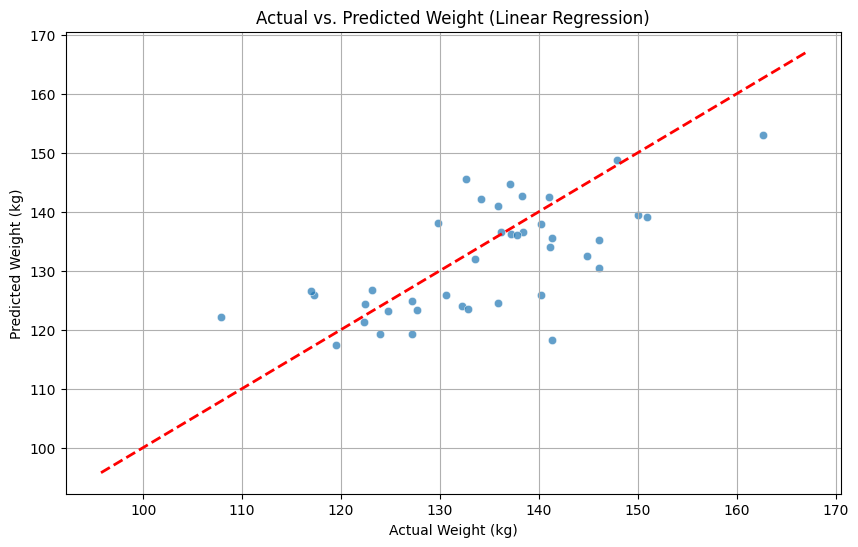

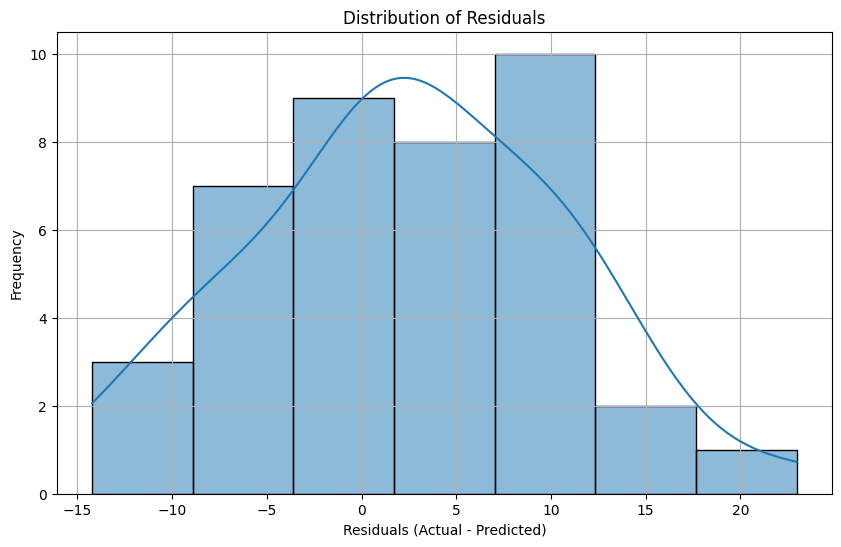

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Preprocessing ---

# For demonstration, creating a synthetic dataset similar to a healthcare context.
# In a real project, you would load from Kaggle/UCI, e.g., pd.read_csv('your_dataset.csv')
np.random.seed(42) # for reproducibility
n_samples = 200

# Features: Height (cm), Age (years), Exercise Level (1=low, 5=high)
height = np.random.normal(170, 15, n_samples)
age = np.random.randint(20, 70, n_samples)
exercise_level = np.random.randint(1, 6, n_samples)

# Target: Weight (kg) - a simplified linear relationship with some noise
# Formula: Weight = c0 + c1*Height + c2*Age + c3*Exercise_Level + noise
# We expect weight to increase with height and possibly age, decrease with exercise level.
weight = (0.6 * height + 0.15 * age - 2.5 * exercise_level + 30 +
          np.random.normal(0, 7, n_samples)) # Adding random noise

data = pd.DataFrame({
    'Height_cm': height,
    'Age_years': age,
    'Exercise_Level': exercise_level,
    'Weight_kg': weight
})

print("--- Dataset Head ---")
print(data.head())

print("\n--- Dataset Info ---")
data.info()

print("\n--- Descriptive Statistics ---")
print(data.describe())

print("\n--- Missing Values Check ---")
print(data.isnull().sum()) # Check for any missing values

# Define features (X) and target (y)
X = data[['Height_cm', 'Age_years', 'Exercise_Level']]
y = data['Weight_kg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- 2. Model Training ---

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("\n--- Model Training Complete ---")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# --- 3. Evaluation using Mean Squared Error (MSE) ---

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) on the test set: {mse:.2f}")

# Optional: Visualization of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Ideal prediction line
plt.title('Actual vs. Predicted Weight (Linear Regression)')
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.grid(True)
plt.show()

# Optional: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()